In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height =180 

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [11]:
data_cat = data_train.class_names

In [13]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [15]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [17]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


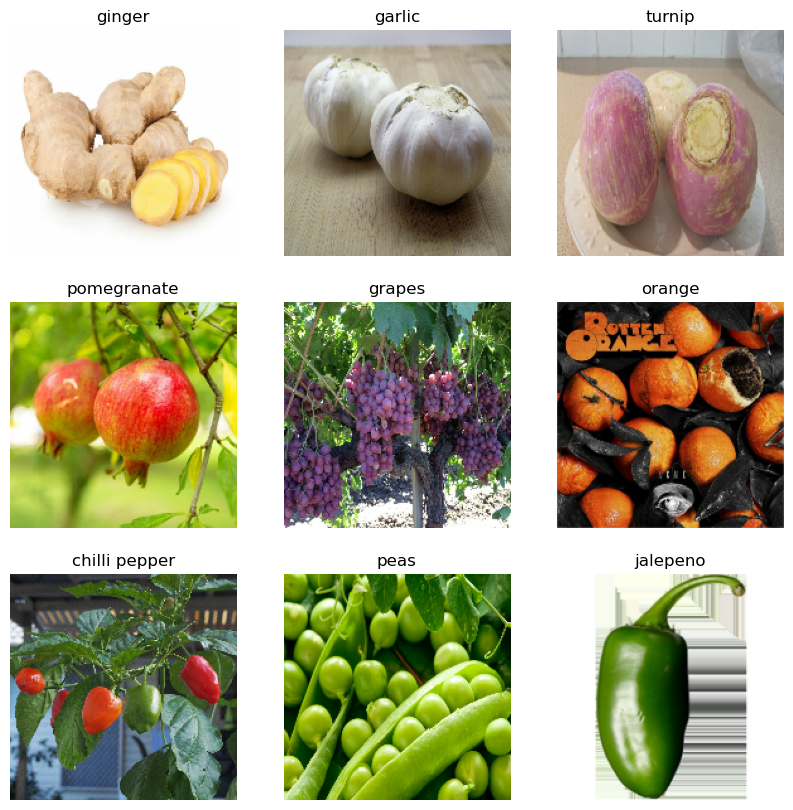

In [19]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [21]:
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 238ms/step - accuracy: 0.0896 - loss: 3.5688 - val_accuracy: 0.4131 - val_loss: 2.1761
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - accuracy: 0.3030 - loss: 2.4070 - val_accuracy: 0.5869 - val_loss: 1.5172
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.4413 - loss: 1.8806 - val_accuracy: 0.7721 - val_loss: 0.9895
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.6595 - loss: 1.2212 - val_accuracy: 0.8405 - val_loss: 0.6069
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.7813 - loss: 0.7749 - val_accuracy: 0.9117 - val_loss: 0.3580
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.8925 - loss: 0.3977 - val_accuracy: 0.9259 - val_loss: 0.3676
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.9240 - loss: 0.2763 - val_accuracy: 0.9573 - val_loss: 0.2714
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.9600 - loss: 0.1671 - val_accu

Text(0.5, 1.0, 'Loss')

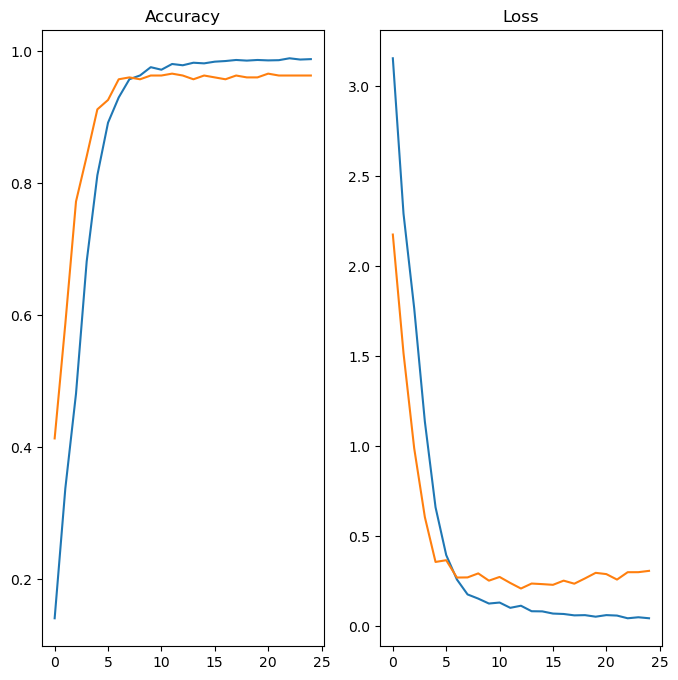

In [29]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [31]:
 image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [33]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [35]:
score = tf.nn.softmax(predict)

In [37]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 98.98


In [39]:
model.save('Image_classify.keras')